# Phase 2: Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


This shows the first 5 rows of the dataset to understand its structure and features

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Statistical summary of the dataset, including count of records, unique values, and most frequent categories

In [4]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


Checking for missing values in each column. The result shows no missing values in the dataset

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object
Numeric columns: Index([], dtype='object')
No numeric columns found. Using countplots for categorical data instead.


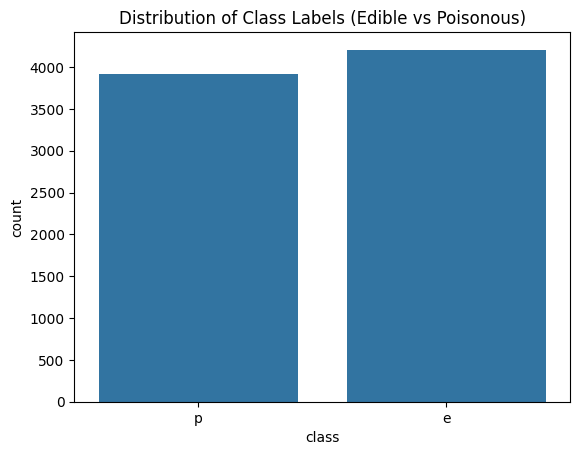

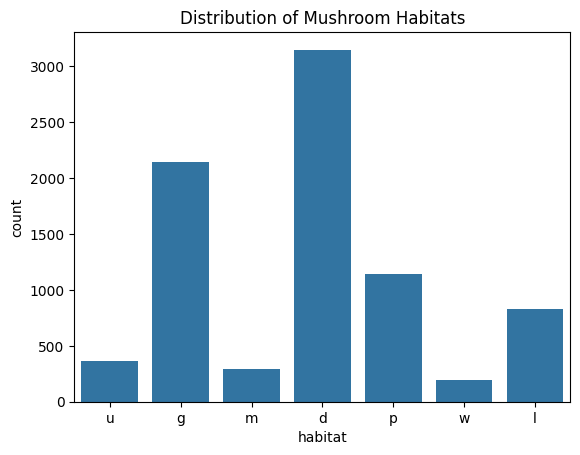

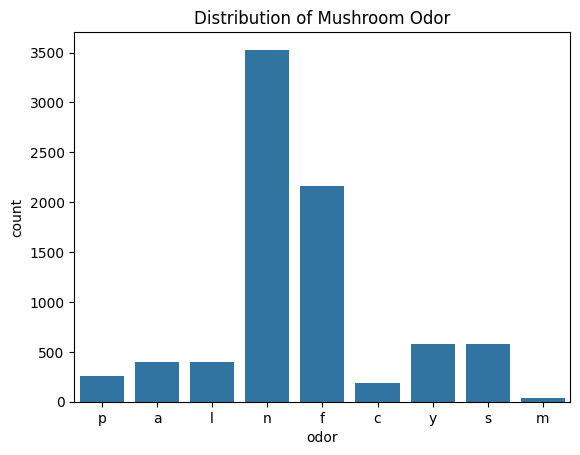

In [6]:
print(df.dtypes)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)

if len(numeric_cols) > 0:
    df[numeric_cols].hist(figsize=(12, 8))
    plt.show()
else:
    print("No numeric columns found. Using countplots for categorical data instead.")

sns.countplot(x='class', data=df)
plt.title("Distribution of Class Labels (Edible vs Poisonous)")
plt.show()

sns.countplot(x='habitat', data=df)
plt.title("Distribution of Mushroom Habitats")
plt.show()

sns.countplot(x='odor', data=df)
plt.title("Distribution of Mushroom Odor")
plt.show()

This plot shows the distribution of edible (e) vs poisonous (p) mushrooms. The classes are almost balanced

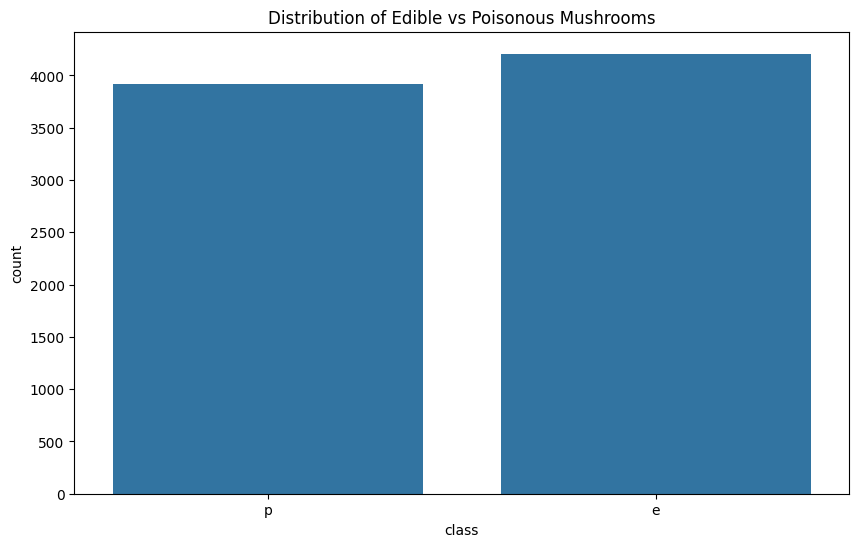

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='class', data=df)
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.show()

This plot shows the distribution of mushrooms by class (edible vs poisonous). It helps us understand if the dataset is balanced between the two categories

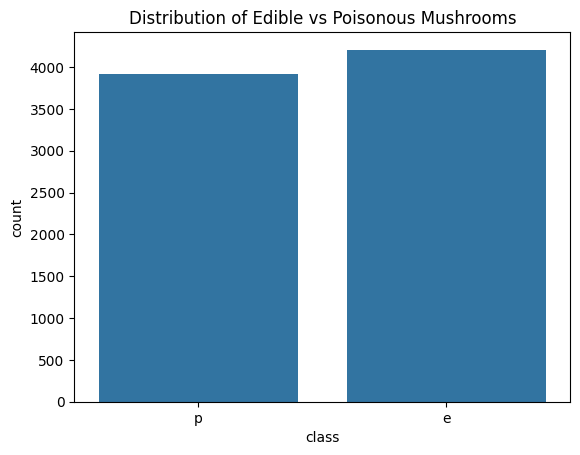

In [9]:
sns.countplot(x='class', data=df)
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.show()

This plot confirms the class label distribution, showing how many mushrooms are edible compared to poisonous

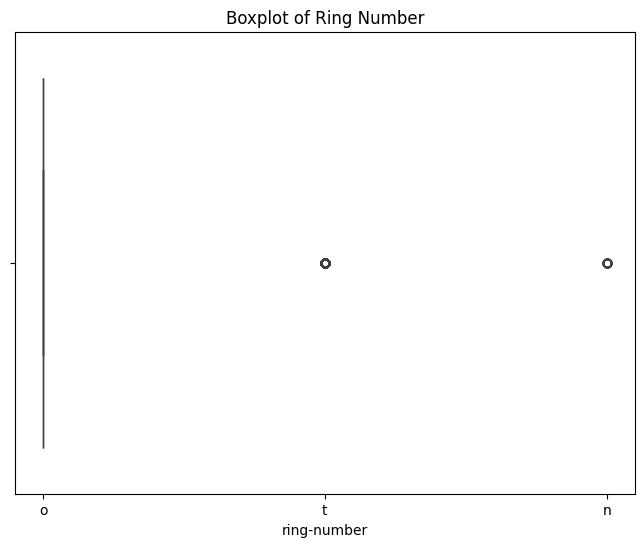

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['ring-number'])
plt.title("Boxplot of Ring Number")
plt.show()

This boxplot displays the distribution of the numeric feature ‘ring-number’. It helps detect outliers and shows the spread of values

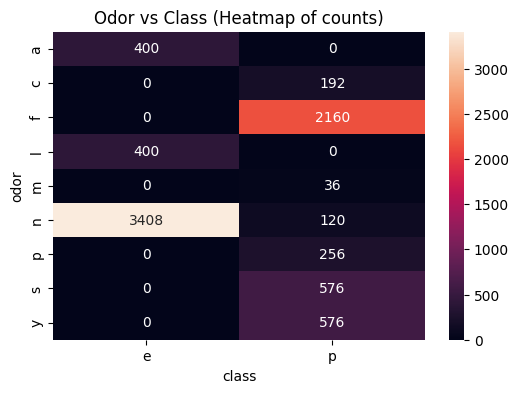

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df['odor'], df['class'])
plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt='d')
plt.title('Odor vs Class (Heatmap of counts)')
plt.xlabel('class')
plt.ylabel('odor')
plt.show()

This heatmap shows the frequency of each odor value across classes. Some odors strongly correlate with poisonous mushrooms, confirming odor is a discriminative feature

No missing values were found. The dataset is balanced. Odor is a strong discriminative feature. Boxplot shows no critical outliers. Data is ready for preprocessing (encoding categorical features)